# Stock Price Prediction using Python and Machine Learning

This program uses an artificial recurrent neural network called Long Short Term Memory (LSTM) to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

I am using LSTM because it has feedback connections. It can not only process single data points such as images but also entire sequences of data such as speech or video. LSTM are widely used for sequence prediction problems and have been proven to be extremely effective. The reason they work so well is because LTSM is able to store past information that is important and forgive the information that is not important




In [10]:
#Import the libraries
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [15]:
#Get the stock quote
df = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-01-01')
#Show the data
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,14.732143,14.607143,14.621429,14.686786,302220800.0,12.650659
2012-01-04,14.810000,14.617143,14.642857,14.765714,260022000.0,12.718646
2012-01-05,14.948214,14.738214,14.819643,14.929643,271269600.0,12.859850
2012-01-06,15.098214,14.972143,14.991786,15.085714,318292800.0,12.994284
2012-01-09,15.276786,15.048214,15.196429,15.061786,394024400.0,12.973674
...,...,...,...,...,...,...
2020-12-24,133.460007,131.100006,131.320007,131.970001,54930100.0,131.773087
2020-12-28,137.339996,133.509995,133.990005,136.690002,124486200.0,136.486053
2020-12-29,138.789993,134.339996,138.050003,134.869995,121047300.0,134.668762


In [16]:
#Get the number of rows and columns in the data set
df.shape

(2265, 6)

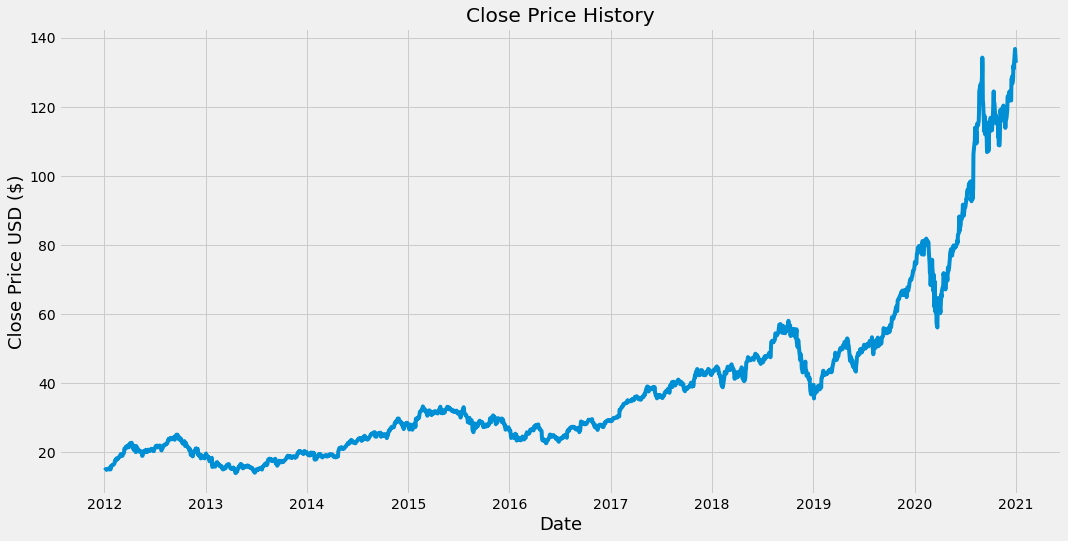

In [20]:
#Visualize the closing price history
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

It seems like Apple stock price or closing price has been increasing over the years so it seems like a good stock to buy.

In [21]:
#Create a new dataframe with only the 'CLose column'
data = df.filter(['Close'])
#Conver the dataframe to a NumPy array
dataset = data.values
#Get the number of rows to train the model on 
training_data_len = math.ceil(len(dataset) * .8)

training_data_len

1812

In [22]:
#Scale the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00602306],
       [0.0066661 ],
       [0.00800165],
       ...,
       [0.98517215],
       [0.97580299],
       [0.96741145]])

In [24]:
#Create the training data set 
#Create the scaled training data set
train_data = scaled_data[0:training_data_len, :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

#Append the past 60 values to the x_train dataset
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0]) #never reaches i
  y_train.append(train_data[i,0])#contain the 61st value
  if i <= 61:
    print(x_train)
    print(y_train)
    print()


[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00866214, 0.01073094, 0.00869416,
       0.0163321 , 0.01574144, 0.0165125 , 0.01817975, 0.01918941,
       0.01910503, 0.0187937 , 0.02012052, 0.02136877, 0.02278289,
       0.025067  , 0.02986508, 0.02993782, 0.03260892, 0.03460496,
       0.03117444, 0.03249544, 0.03246925, 0.03617329, 0.03564663,
       0.03662137, 0.03837301, 0.03934777, 0.04215562, 0.04420112,
       0.04479179, 0.04499838, 0.04150094, 0.04065712, 0.04078224,
       0.0440702 , 0.04499548, 0.0469828 , 0.0516674 , 0.05791742,
       0.05674772, 0.05675062, 0.06126938, 0.0626835 , 0.06167673,
       0.06075728, 0.05979999, 0.06298027, 0.06516255, 0.06607619])]
[0.06381826722571945]

[array([0.00602306, 0.0066661 , 0.00800165, 0.00927319, 0.00907824,
       0.0095176 , 0.00931683, 0.0089793 , 0.00851957, 0.00994242,
       0.01122559, 0.01082987, 0.00

In [25]:
#Convert the x_train and y_train to numpy arrays to train the LSTM model 
x_train, y_train = np.array(x_train), np.array(y_train)

In [28]:
#Reshape the data
#LSTM network expects the data to be 3 dimensional in a form of the number of samples, number of time steps and number of features
#Currently the train data set is 2 dimensional 
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1)) #the numbers are the number of samples (rows), time steps (columns) and features (closing price)
x_train.shape

(1752, 60, 1)

In [31]:
#Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (x_train.shape[1], 1))) #input_shape(time steps, features)
model.add(LSTM(50,return_sequences= False)) #False since the lsdm layers are no longer going to be used in the model
model.add(Dense(25)) #Dense(neurons)
model.add(Dense(1))

In [32]:
#Compile the model
#Optimizer is used to improve upon the loss function and the loss funciton is used to measure how well the model did on training
model.compile(optimizer='adam', loss='mean_squared_error')

In [34]:
#Train the model
#batch size is the total number of training examples present in a single batch
#epoch is the number of iterations when an entire dataset is passed forward and backward through the neural network
model.fit(x_train,y_train, batch_size= 1, epochs=1) #batch size is the total number of training examples present in a single batch

1752/1752 [==============================] - 44s 24ms/step - loss: 0.0011


In [51]:
#Create the testing data set

#Create a new array containing scaled values from index 1543 to 2000
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :] #all of the values for the model to predict - actual test value (61st)

#Append the past 60 values to the x_test 
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])


In [52]:
#Convert the data to a numpy array
x_test = np.array(x_test) 


In [53]:
#Reshape the data
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))


In [55]:
#Get the models predicted price values from the x_test dataset
predictions = model.predict(x_test) #want the x_test to be the exact same value as y_test once the data is inverse transformed
predictions = scaler.inverse_transform(predictions) #unscaling the values

RMSE is a good measure of how accurate the model predicts the response. Its is the standard deviation of the residuals and the lower value of rmse indicate a better fit.


In [56]:
#Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse 

3.5849090222491333

The value of 0 for the mean square error means that the predictions were exact or perfect. That the model got the right values exactly as they were supposed to be from the testing data. So the y_test and the predictions, the values in those data sets match up.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


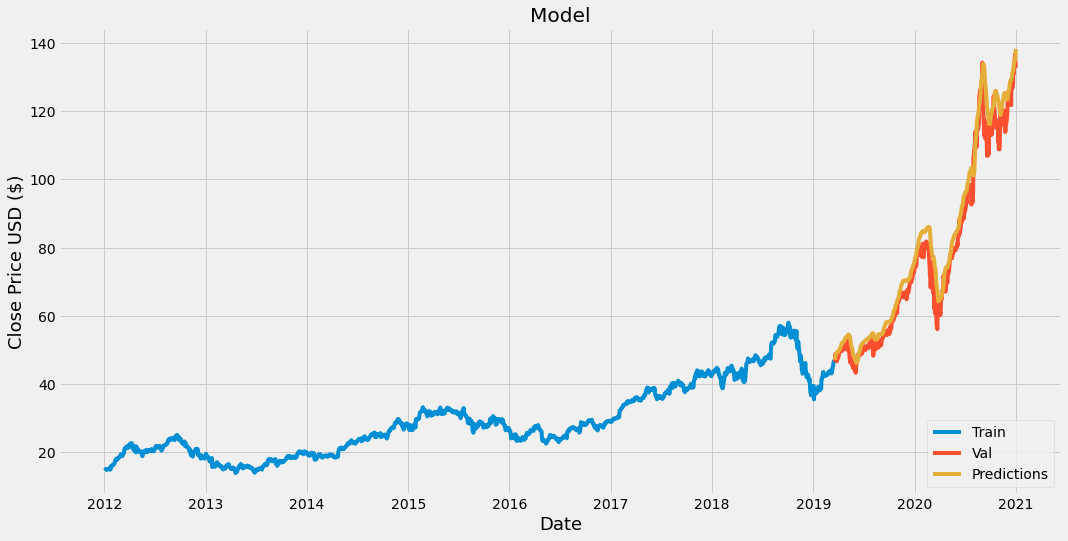

In [58]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc ='lower right')
plt.show()

In [59]:
#Show the valid and predicted prices
valid

,Close,Predictions
Date,,
2019-03-19,46.632500,47.115376
2019-03-20,47.040001,47.534111
2019-03-21,48.772499,47.931549
2019-03-22,47.762501,48.446884
2019-03-25,47.185001,48.892719
...,...,...
2020-12-24,131.970001,134.168579
2020-12-28,136.690002,135.024689
2020-12-29,134.869995,136.238541


The model looks like its doing a good job predicting the closing prices since the values are very close to each other.

In [70]:
#Get the quote
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-01-04')

#Create a new dataframe
new_df = apple_quote.filter(['Close'])

#Get the last 60 day closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values

#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)

#Create an empty list
X_test = []

#Append the past 60 days
X_test.append(last_60_days_scaled)

#Convert the X_test data set to a numpy array
X_test = np.array(X_test)

#Reshape the data
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

#Get the predicted scaled price
pred_price = model.predict(X_test)

#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[138.736]]


In [71]:
#Get the quote
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2021-01-04', end='2021-01-04')
print(apple_quote2['Close'])

Date
2021-01-04    129.410004
Name: Close, dtype: float64


So here the predicted stock price for apple is 138 and the actual price is 129 for this model which shows that the prediction is still reliable with the small difference in values.